In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
plt.figure(dpi=300)

warnings.filterwarnings('ignore')

<Figure size 1920x1440 with 0 Axes>

In [21]:
df = pd.read_csv('../1d_fixed_beta_2/1d_fixed_results.csv')
df.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,...,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,ols_est_mse,robust_m_est_mse,robust_mm_est_mse,robust_s_est_mse,ols_diag_est_mse
0,50,0.0,0.5,0,4,-0.001697,0.025843,-0.001534,0.025950,-0.021544,...,1.034086,1.035349,1.035356,1.139081,1.050010,0.024279,0.025717,0.025823,0.086494,0.034667
1,50,0.0,1.0,0,4,-0.009302,0.026073,-0.009258,0.025928,-0.021770,...,1.065405,1.069325,1.069464,1.159824,1.083423,0.023586,0.026029,0.025884,0.081922,0.035414
2,50,0.0,2.0,0,4,0.002253,0.026653,0.001617,0.027190,0.027910,...,1.066301,1.068935,1.070988,1.167206,1.080132,0.026038,0.026525,0.027056,0.079622,0.031312
3,50,0.1,0.5,0,4,-0.040415,0.020176,-0.037335,0.020393,-0.040323,...,1.056361,1.058020,1.057861,1.153977,1.062632,0.022459,0.021709,0.021685,0.071683,0.025172
4,50,0.1,1.0,0,4,-0.096358,0.029307,-0.066988,0.031651,-0.023022,...,1.087906,1.061803,1.059262,1.164424,1.061652,0.059709,0.038446,0.035980,0.092880,0.035949


In [22]:
df.columns

Index(['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_mm_est_bias',
       'robust_mm_est_variance', 'robust_s_est_bias', 'robust_s_est_variance',
       'ols_est_bias', 'ols_est_variance', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe',
       'robust_s_mspe', 'ols_diag_mspe', 'ols_est_mse', 'robust_m_est_mse',
       'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse'],
      dtype='object')

In [23]:
feature_columns = ['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [24]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mpse
0,50,0.0,0.5,0,4,ols,1.034086
1,50,0.0,1.0,0,4,ols,1.065405
2,50,0.0,2.0,0,4,ols,1.066301
3,50,0.1,0.5,0,4,ols,1.056361
4,50,0.1,1.0,0,4,ols,1.087906


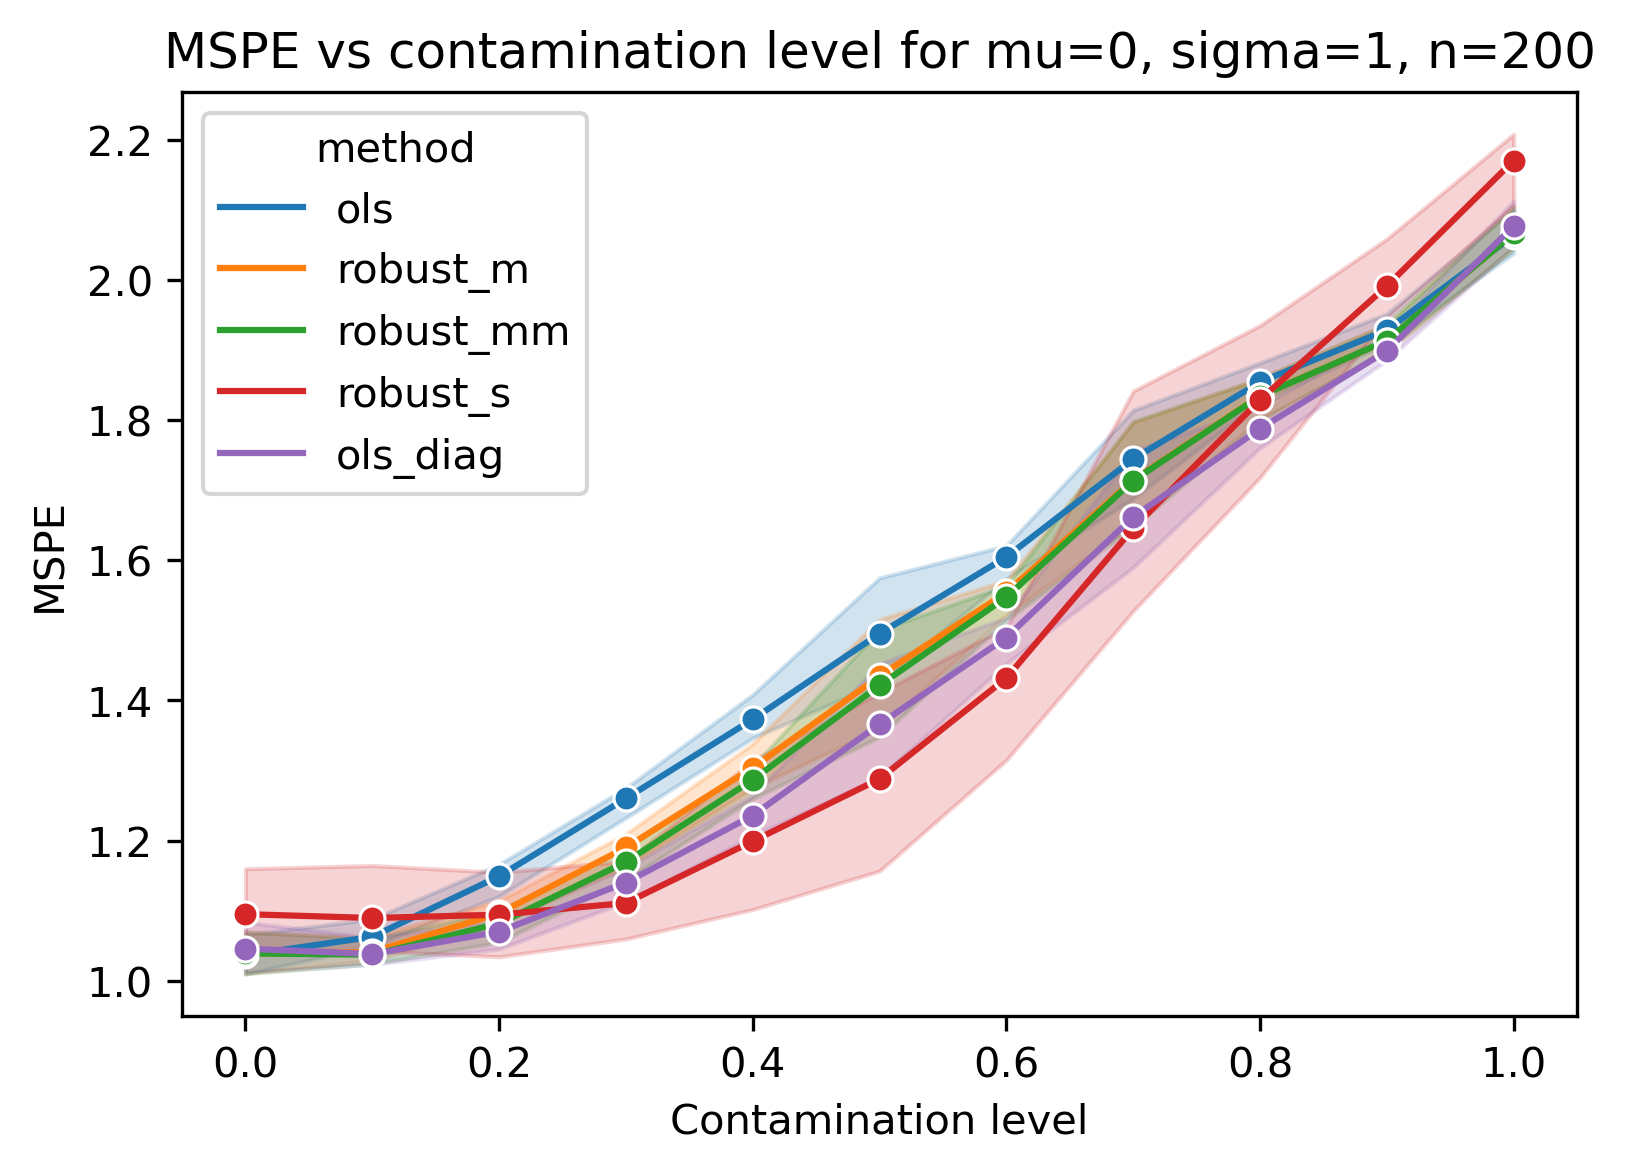

In [39]:
# plotting for mpse
df_mspe_mu0_sigma1_n200 = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'] == 1)]
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
sns.lineplot(data=df_mspe_mu0_sigma1_n200, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MSPE vs contamination level for mu=0, sigma=1, n=200')
plt.xlabel('Contamination level')
plt.ylabel('MSPE')
plt.show()

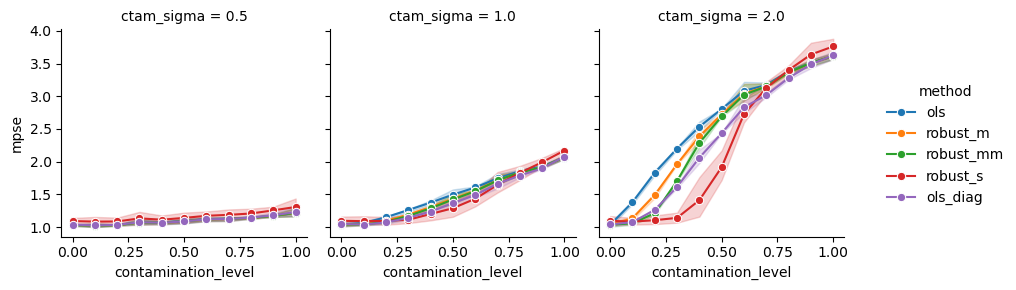

In [7]:
# Facet it by sigma, set mu = 0, sigma = 0.5, 1, 2
df_mpse_mu0_3sigma = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mpse_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mpse', marker='o')
g.add_legend()
plt.show()

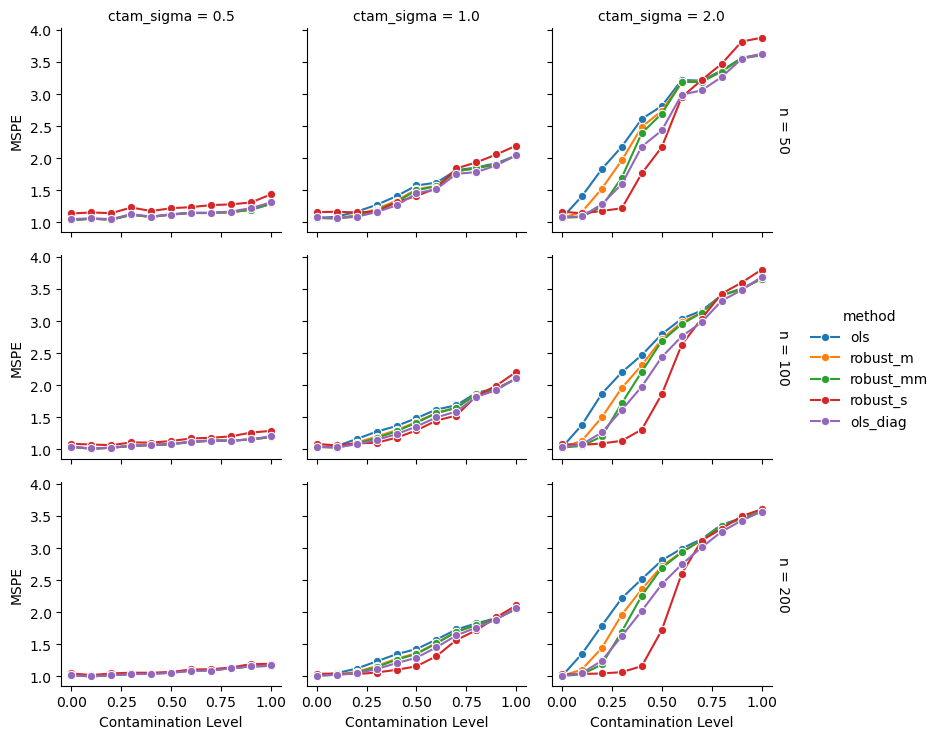

In [53]:
# bias plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_mpse_mu0_3sigma = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mpse_mu0_3sigma, col='ctam_sigma', row='n', hue='method', margin_titles=True, height=2.5, aspect=1.1)
g.map(sns.lineplot, 'contamination_level', 'mpse', marker='o')
g.add_legend()
# change ylabels to mspe
g.set_axis_labels('Contamination Level', 'MSPE')
g.savefig('mpse_facet.png', dpi=300)
plt.show()

In [9]:
df_bias = df[feature_columns + bias_columns]
df_bias = df_bias.melt(id_vars=feature_columns, value_vars=bias_columns, var_name='method', value_name='bias')
df_bias['method'] = df_bias['method'].str.replace('_est_bias', '')
df_bias['bias'] = df_bias['bias'].abs()
df_bias.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,bias
0,50,0.0,0.5,0,4,ols,0.002285
1,50,0.0,1.0,0,4,ols,0.010416
2,50,0.0,2.0,0,4,ols,0.002360
3,50,0.1,0.5,0,4,ols,0.042067
4,50,0.1,1.0,0,4,ols,0.158218


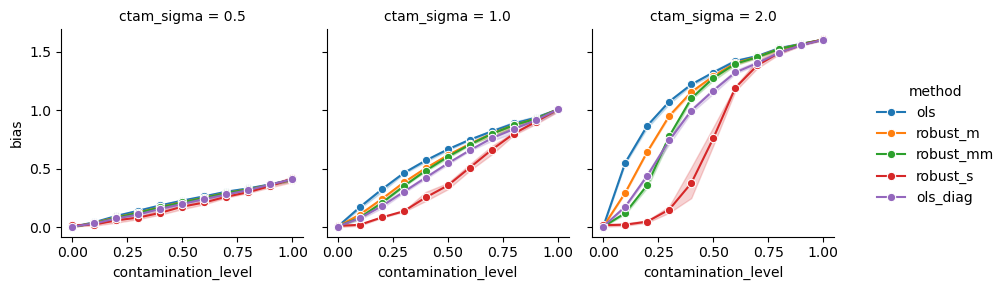

In [10]:
# bias plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_bias_mu0_3sigma = df_bias[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_bias_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'bias', marker='o')
g.add_legend()
plt.show()

In [11]:
# variance plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_variance = df[feature_columns + variance_columns]
df_variance = df_variance.melt(id_vars=feature_columns, value_vars=variance_columns, var_name='method', value_name='variance')
df_variance['method'] = df_variance['method'].str.replace('_est_variance', '')
df_variance.head()


,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,variance
0,50,0.0,0.5,0,4,ols,0.024395
1,50,0.0,1.0,0,4,ols,0.023596
2,50,0.0,2.0,0,4,ols,0.026163
3,50,0.1,0.5,0,4,ols,0.020794
4,50,0.1,1.0,0,4,ols,0.034850


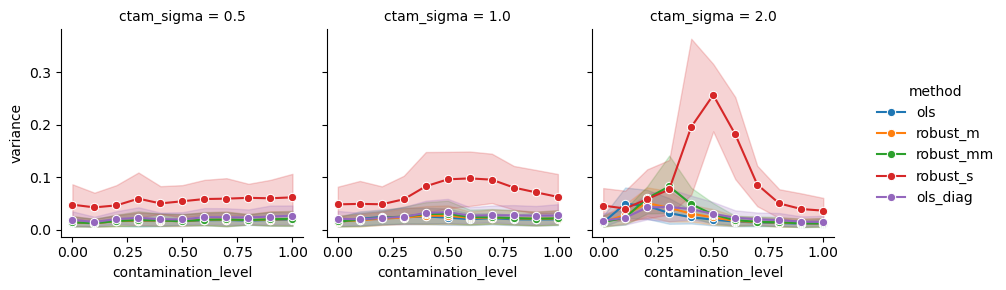

In [12]:
df_variance_mu0_3sigma = df_variance[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_variance_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'variance', marker='o')
g.add_legend()
plt.show()


In [13]:
# mse plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_est_mse', '')
df_mse.head()


,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mse
0,50,0.0,0.5,0,4,ols,0.024279
1,50,0.0,1.0,0,4,ols,0.023586
2,50,0.0,2.0,0,4,ols,0.026038
3,50,0.1,0.5,0,4,ols,0.022459
4,50,0.1,1.0,0,4,ols,0.059709


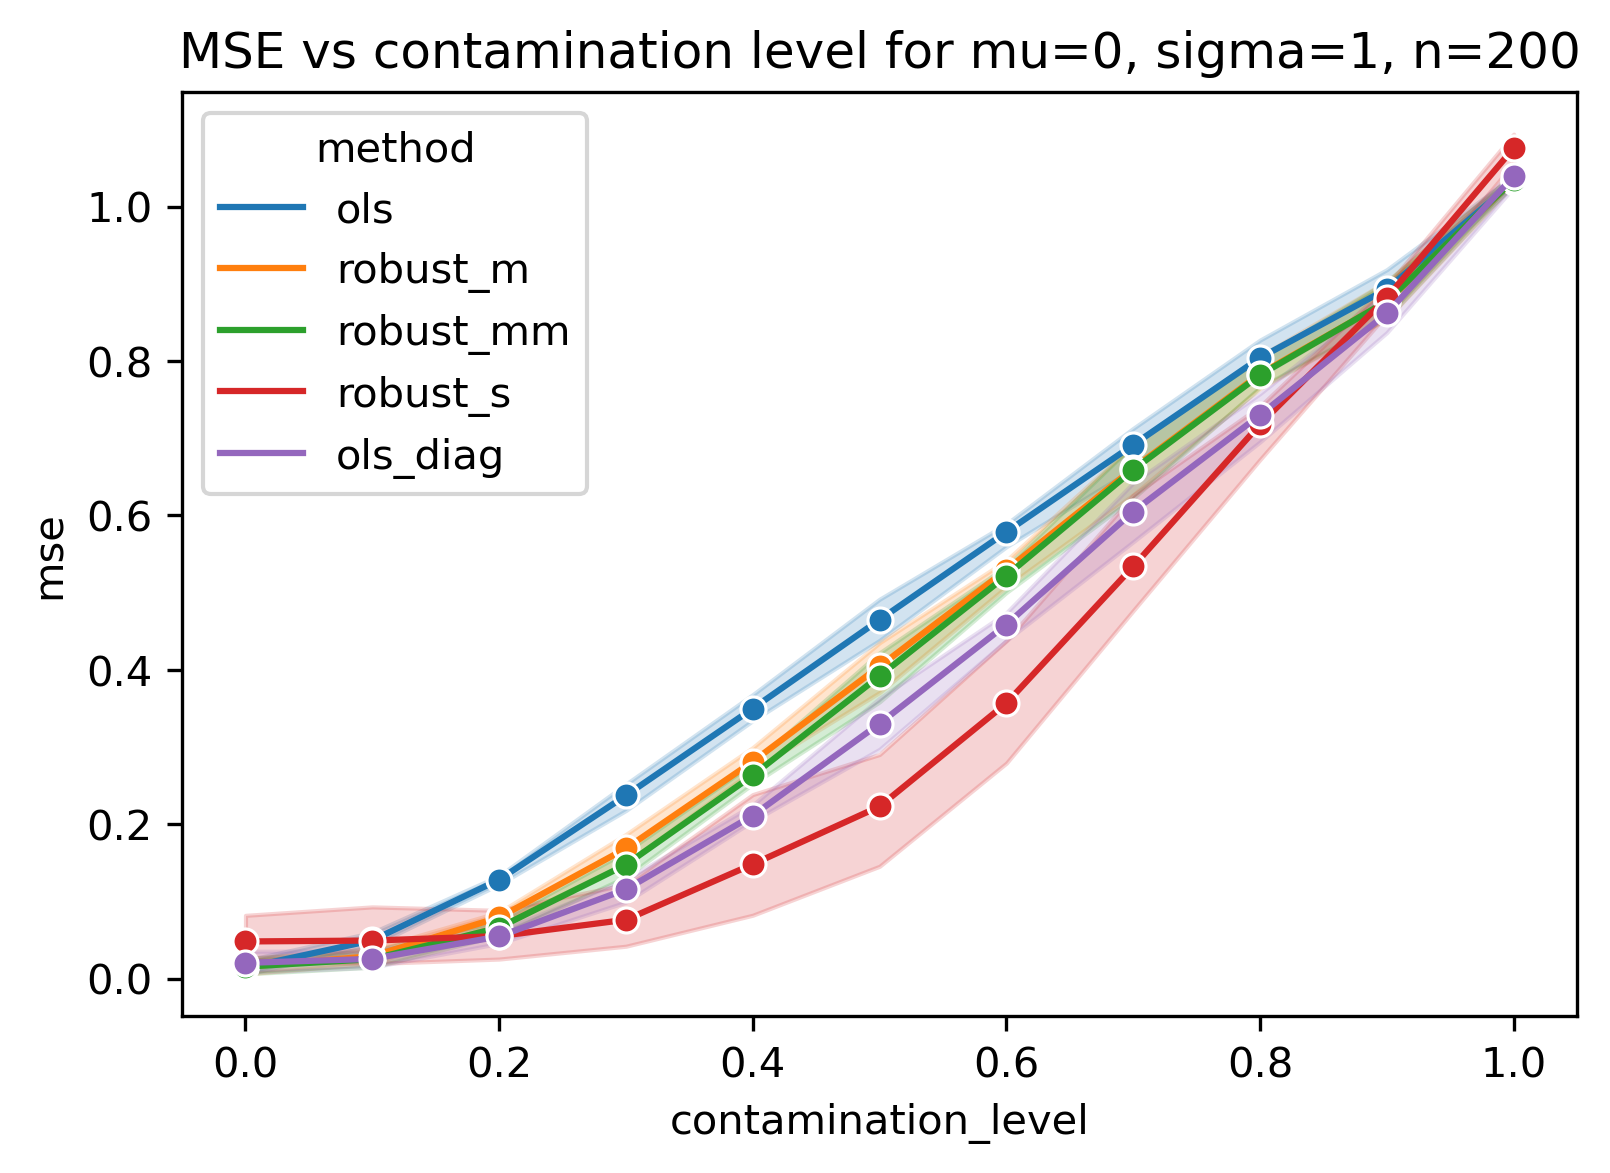

In [37]:
# plotting for mpse
df_mse_mu0_sigma1_n200 = df_mse[(df_mse['ctam_mu'] == 0) & (df_mse['ctam_sigma'] == 1)]
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
sns.lineplot(data=df_mse_mu0_sigma1_n200, x='contamination_level', y='mse', hue='method', marker='o', ax=ax)
plt.title('MSE vs contamination level for mu=0, sigma=1, n=200')
plt.show()

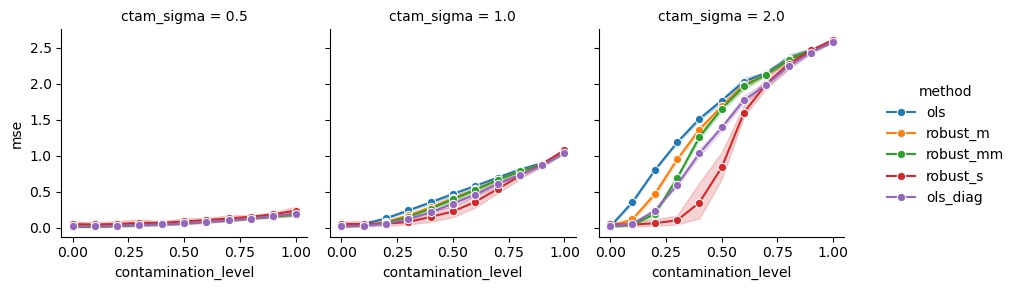

In [27]:
df_mse_mu0_3sigma = df_mse[(df_mse['ctam_mu'] == 0) & (df_mse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mse_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mse', marker='o')
g.add_legend()
plt.show()

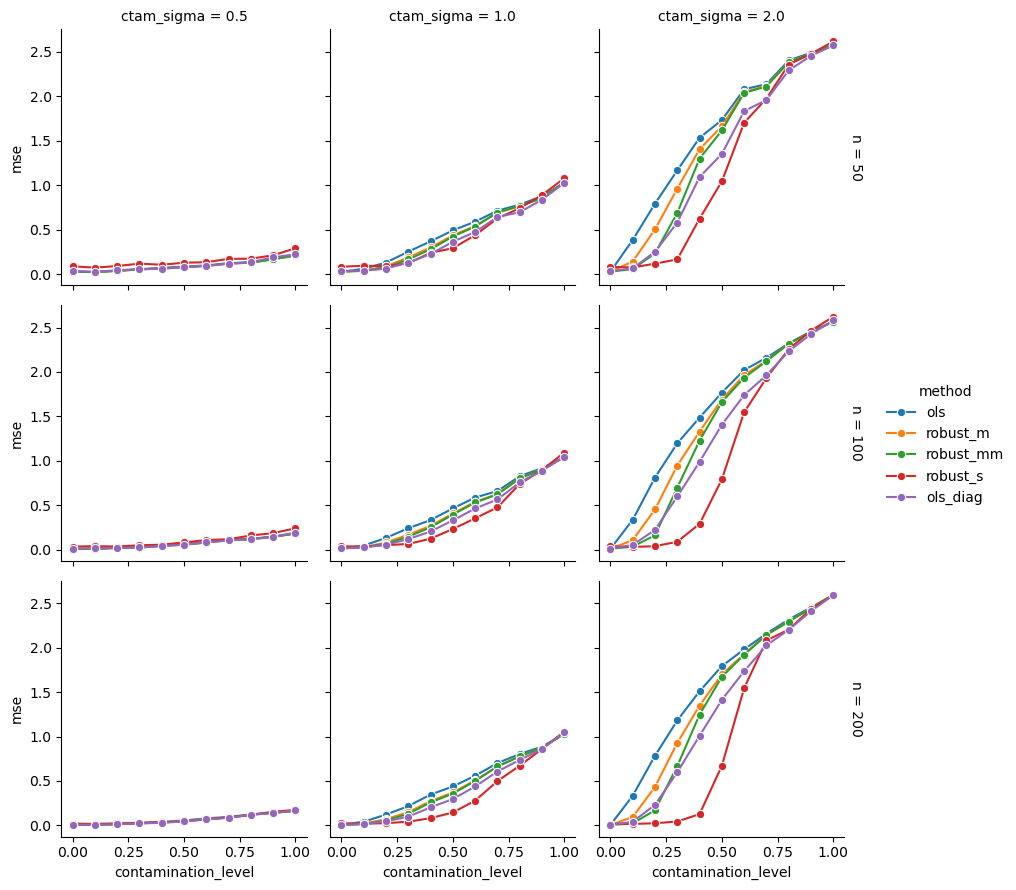

In [15]:
# set row facet tp n
g = sns.FacetGrid(df_mse_mu0_3sigma, col='ctam_sigma', row='n', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mse', marker='o')
g.add_legend()
plt.show()

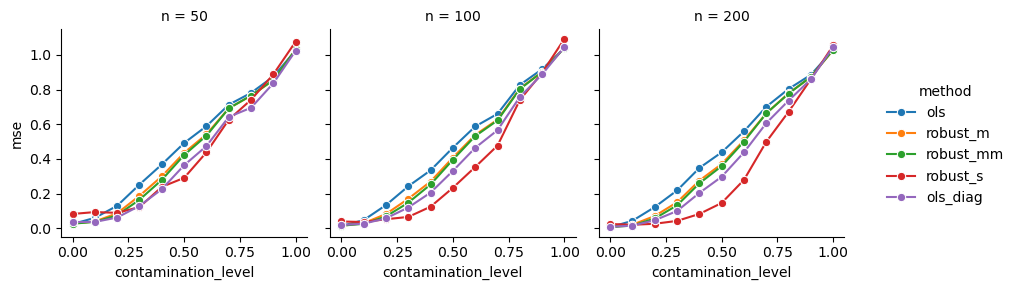

In [17]:
# set row facet tp n
df_mse_mu0_sigma1 = df_mse[(df_mse['ctam_mu'] == 0) & (df_mse['ctam_sigma'] == 1)]
g = sns.FacetGrid(df_mse_mu0_sigma1, col='n',  hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mse', marker='o')
g.add_legend()
plt.show()